In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns

2024-05-22 22:20:02.494264: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [5]:
df.shape

(1117957, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [8]:
df.isnull().any()

id                                 False
MonsoonIntensity                   False
TopographyDrainage                 False
RiverManagement                    False
Deforestation                      False
Urbanization                       False
ClimateChange                      False
DamsQuality                        False
Siltation                          False
AgriculturalPractices              False
Encroachments                      False
IneffectiveDisasterPreparedness    False
DrainageSystems                    False
CoastalVulnerability               False
Landslides                         False
Watersheds                         False
DeterioratingInfrastructure        False
PopulationScore                    False
WetlandLoss                        False
InadequatePlanning                 False
PoliticalFactors                   False
FloodProbability                   False
dtype: bool

In [9]:
df = df.drop('id',axis=1)


In [10]:
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['monsoonintensity', 'topographydrainage', 'rivermanagement',
       'deforestation', 'urbanization', 'climatechange', 'damsquality',
       'siltation', 'agriculturalpractices', 'encroachments',
       'ineffectivedisasterpreparedness', 'drainagesystems',
       'coastalvulnerability', 'landslides', 'watersheds',
       'deterioratinginfrastructure', 'populationscore', 'wetlandloss',
       'inadequateplanning', 'politicalfactors', 'floodprobability'],
      dtype='object')

In [11]:
features = ['monsoonintensity', 'topographydrainage', 'rivermanagement',
       'deforestation', 'urbanization', 'climatechange', 'damsquality',
       'siltation', 'agriculturalpractices', 'encroachments',
       'ineffectivedisasterpreparedness', 'drainagesystems',
       'coastalvulnerability', 'landslides', 'watersheds',
       'deterioratinginfrastructure', 'populationscore', 'wetlandloss',
       'inadequateplanning', 'politicalfactors']
label = ['floodprobability']

In [12]:
X = df[features]
y = df[label]

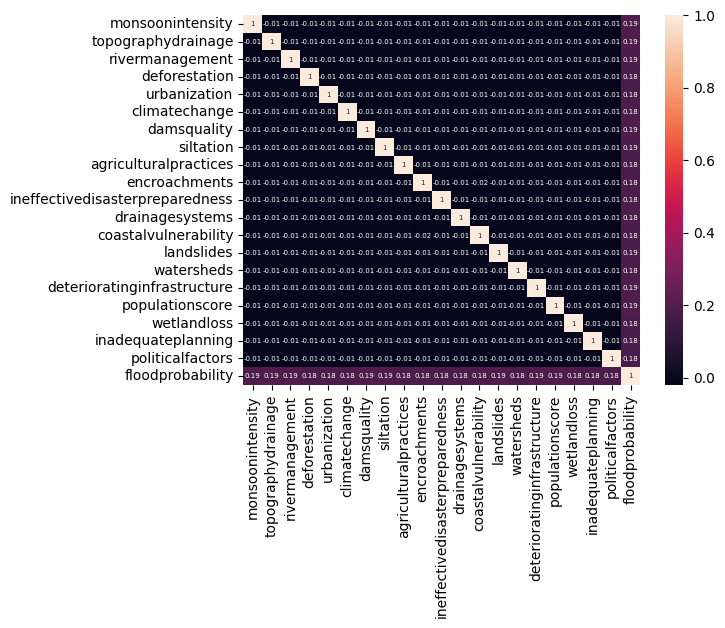

In [13]:
corr_mat = df.corr()
sns.heatmap(corr_mat.round(2), annot=True, annot_kws={'size':5})
plt.show()

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

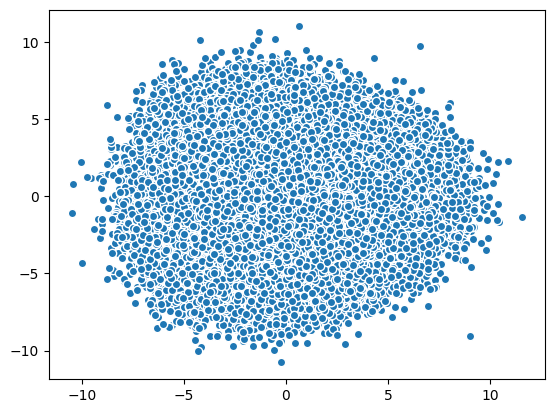

In [16]:
plt.scatter(X_pca[:,0], X_pca[:,1], edgecolor = 'white')
plt.show()

In [18]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X.sample(1000))

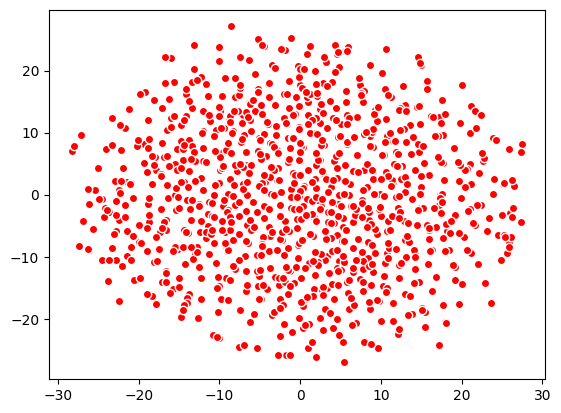

In [22]:
plt.scatter(tsne_data[:,0], tsne_data[:,1], color = 'red',edgecolor = 'white')
plt.show()

In [17]:
y.max(), y.min()

(floodprobability    0.725
 dtype: float64,
 floodprobability    0.285
 dtype: float64)

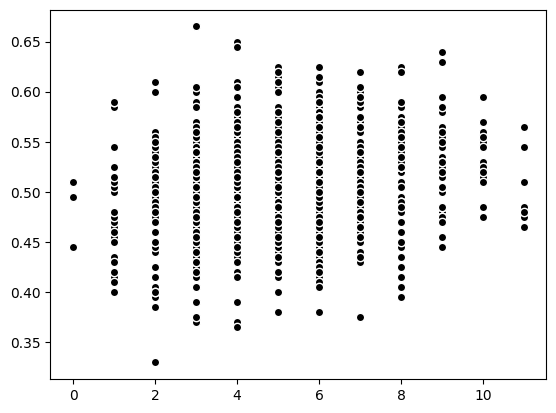

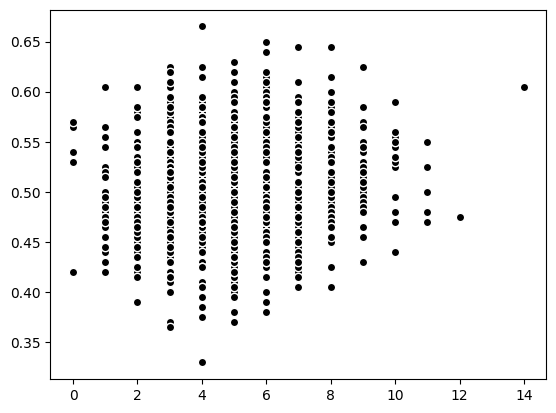

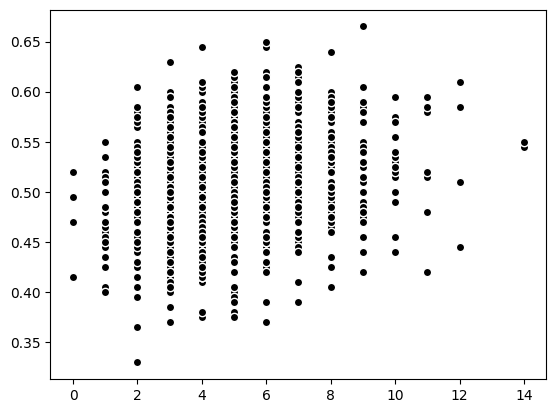

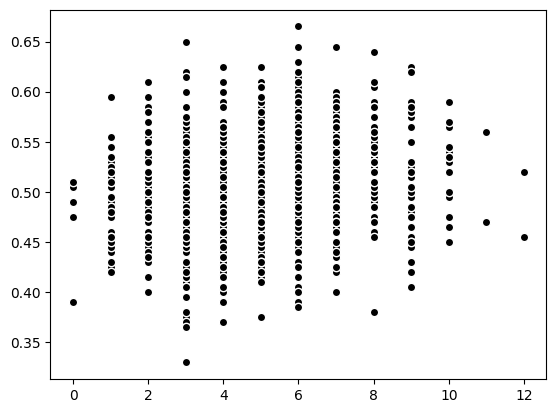

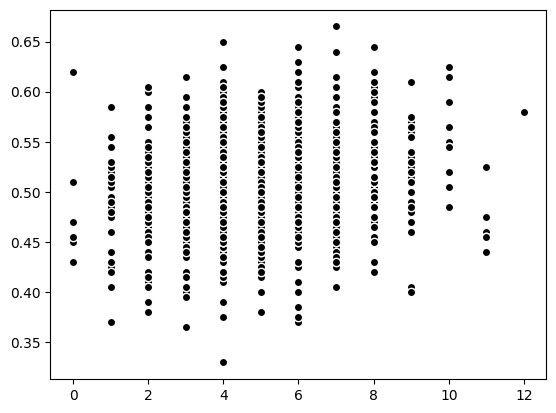

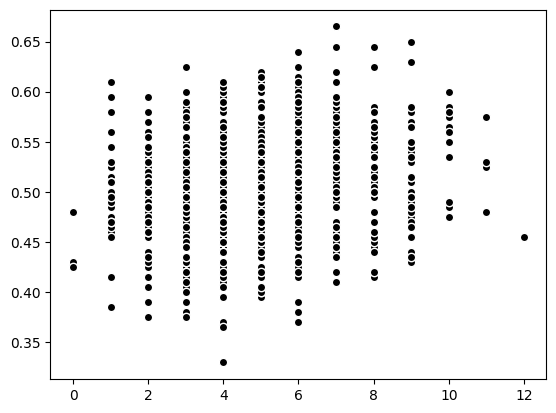

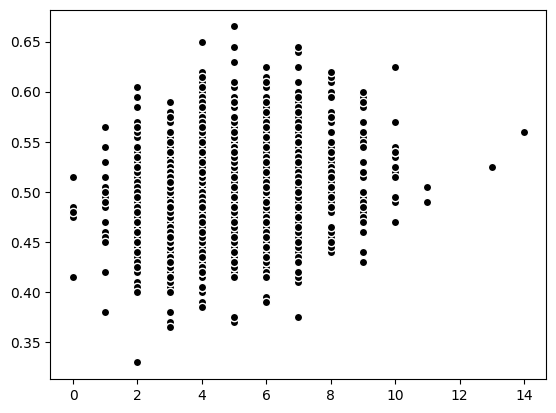

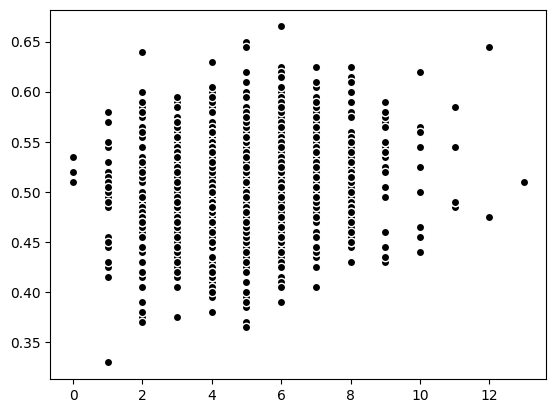

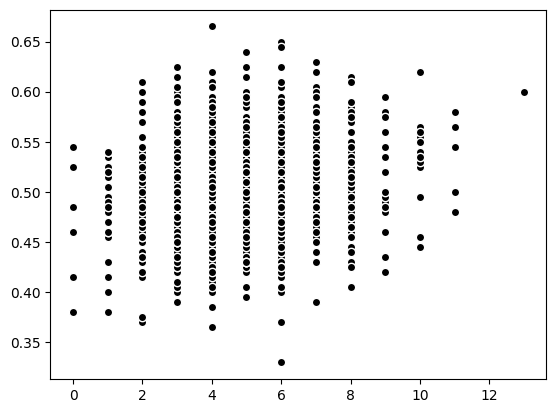

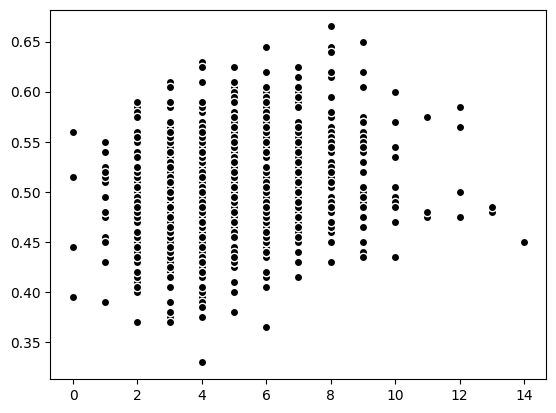

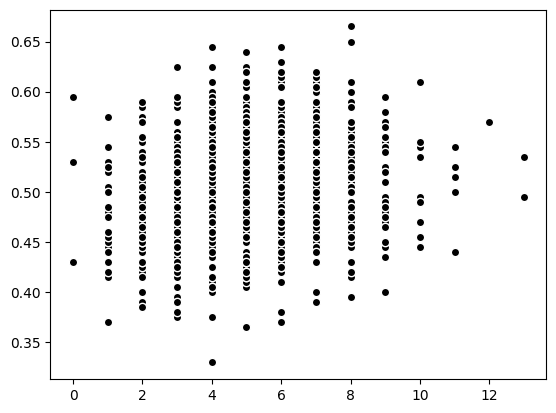

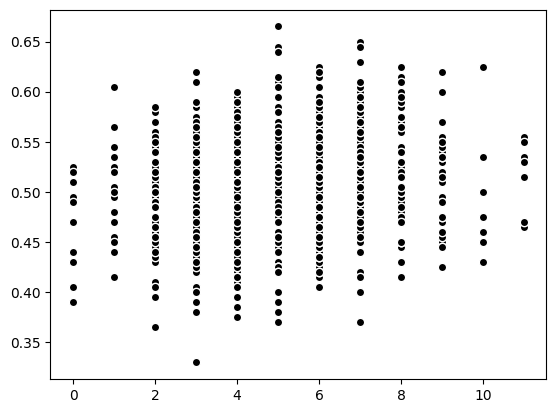

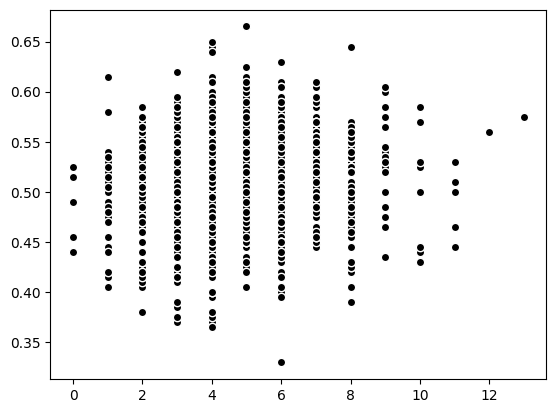

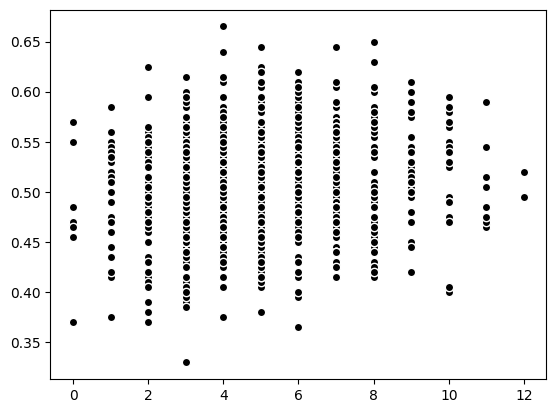

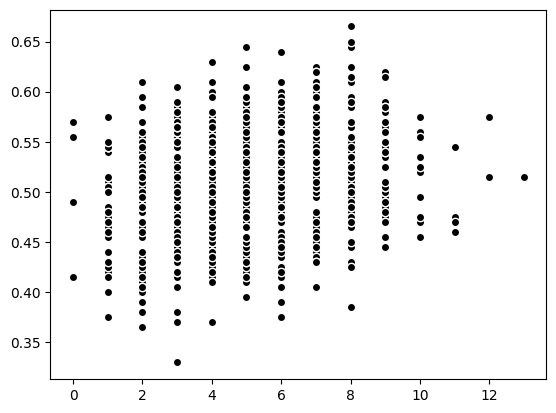

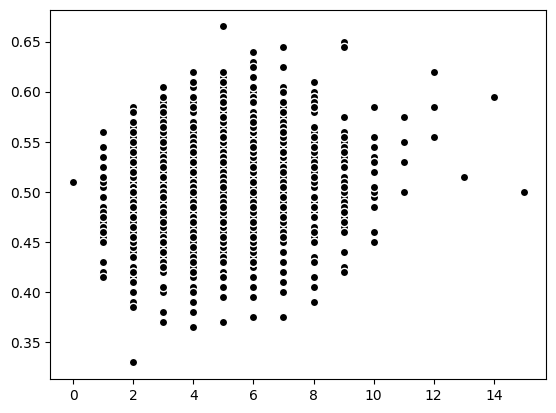

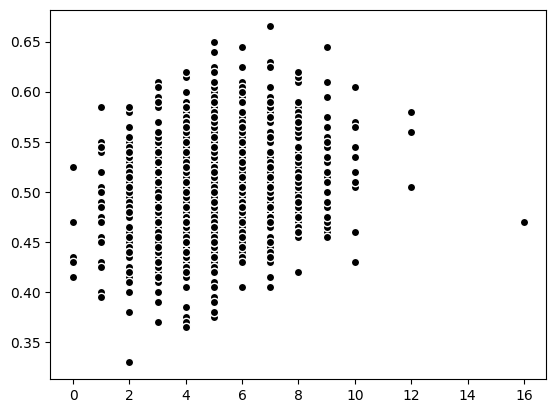

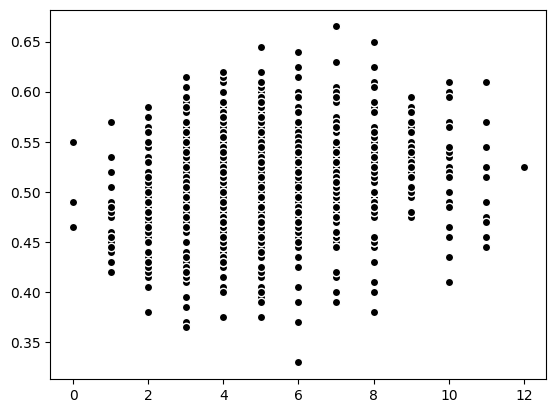

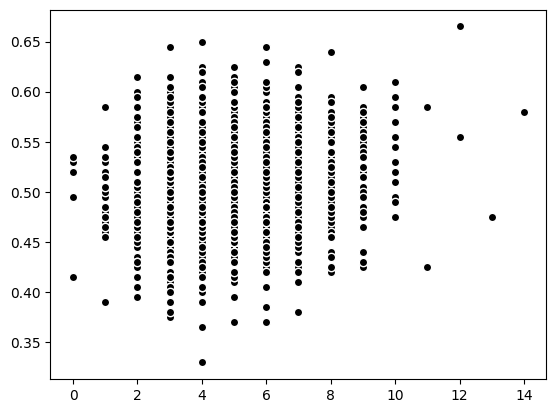

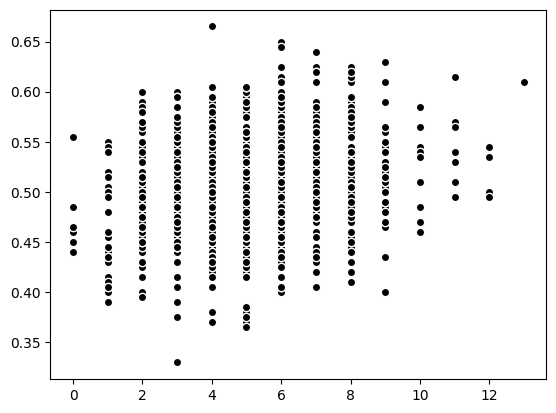

In [18]:
sample_1000 = df.sample(1000, random_state=42)
for i in sample_1000[features]:
    plt.scatter(sample_1000[i], sample_1000[label],color = 'black',edgecolor = 'white')
    plt.show()

In [34]:
from sklearn.model_selection import train_test_split

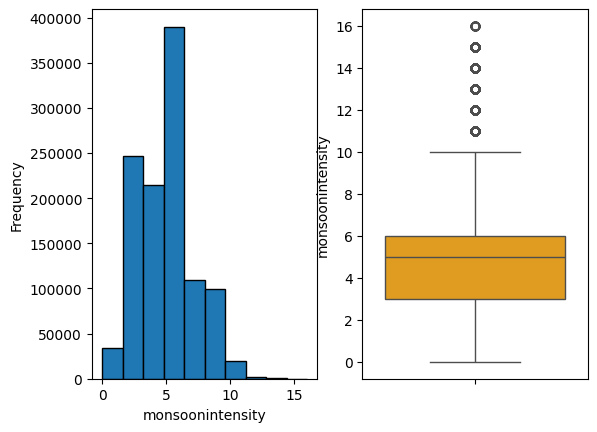

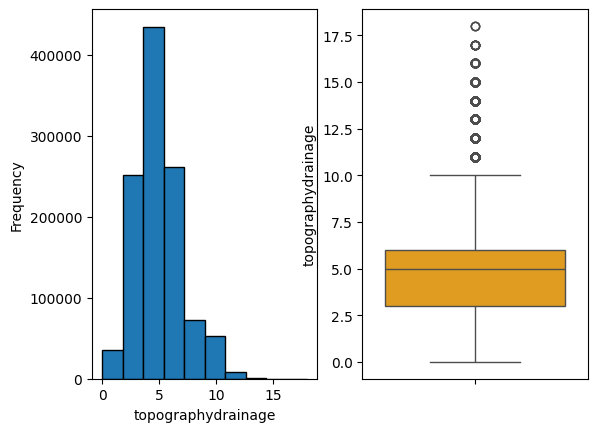

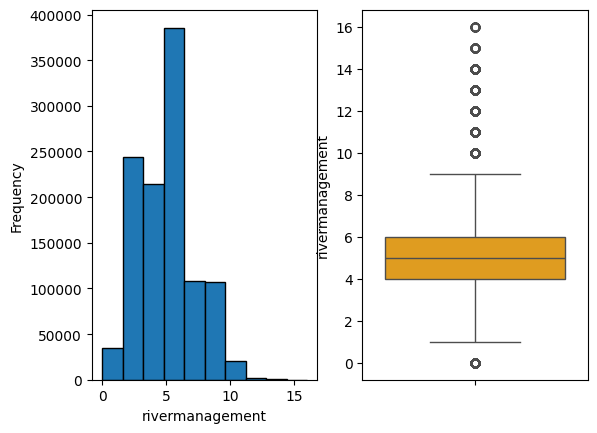

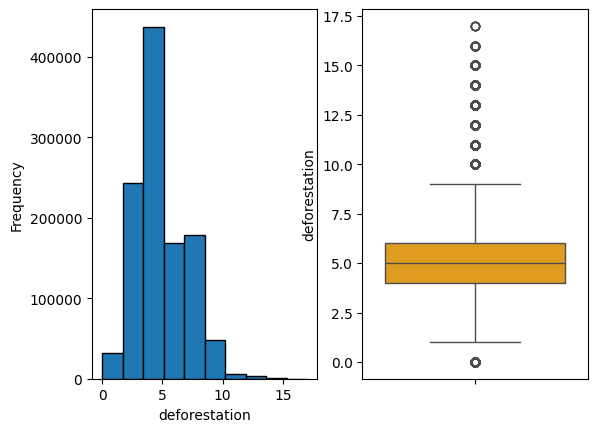

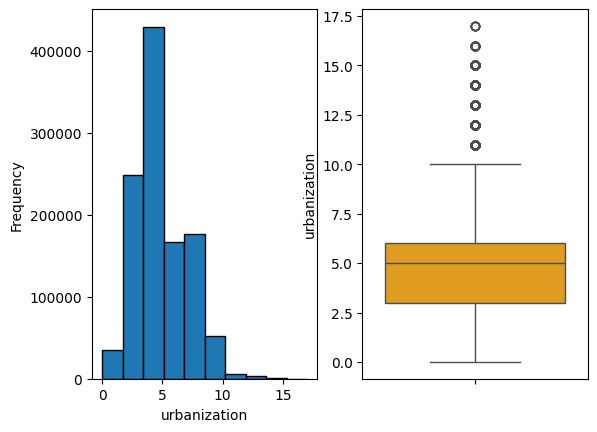

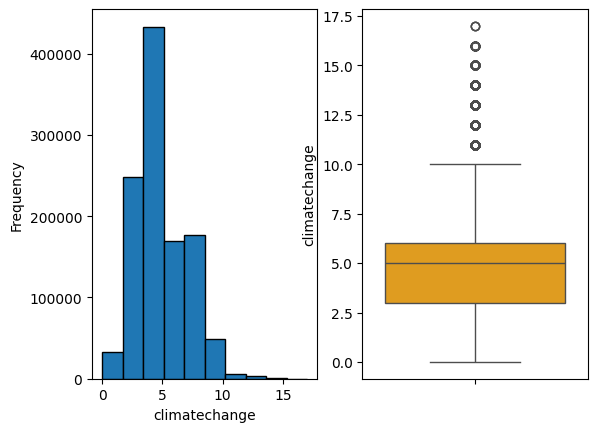

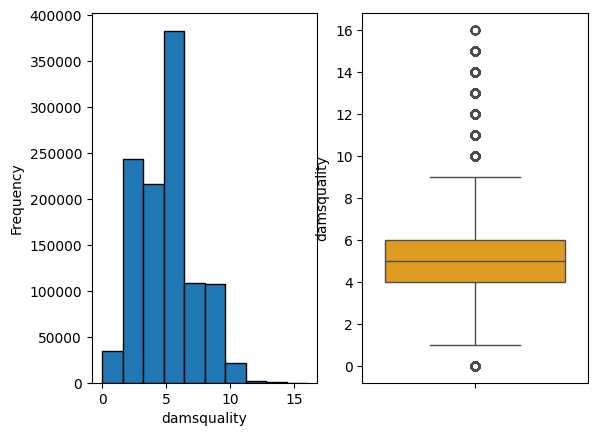

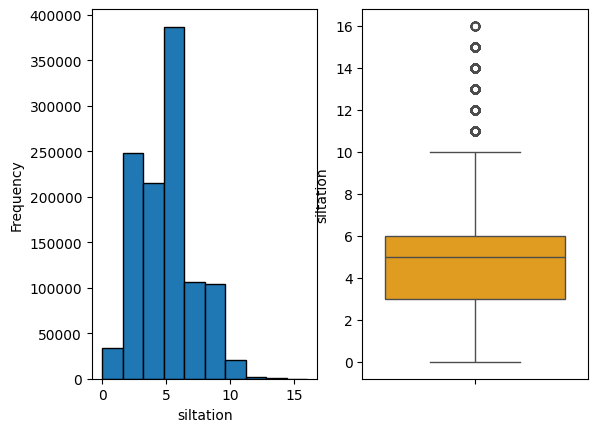

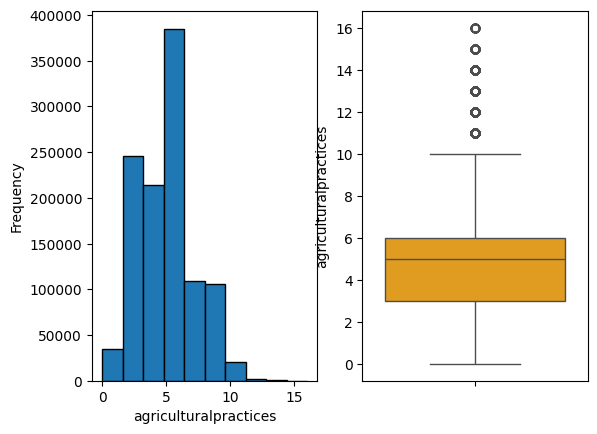

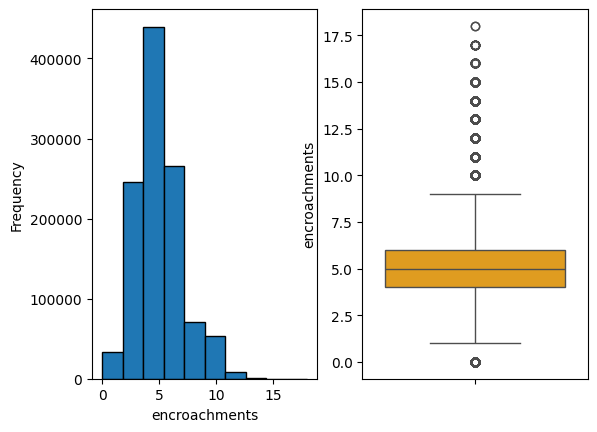

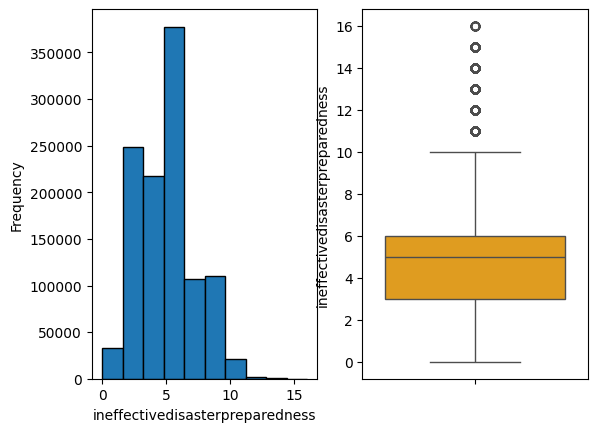

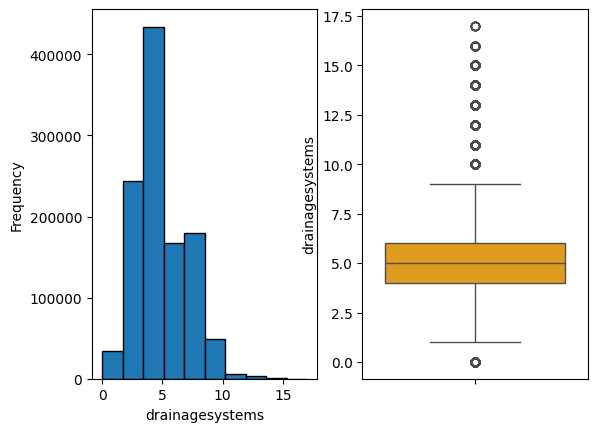

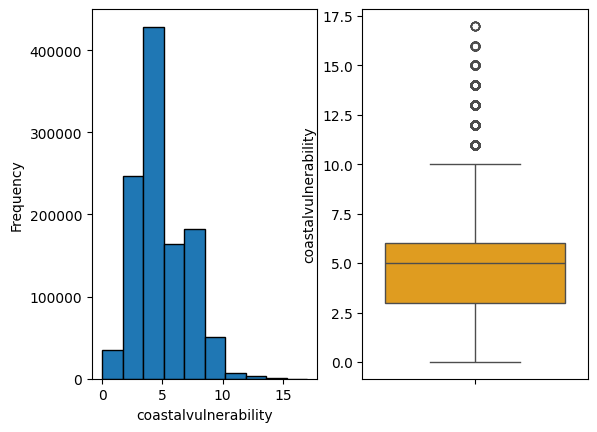

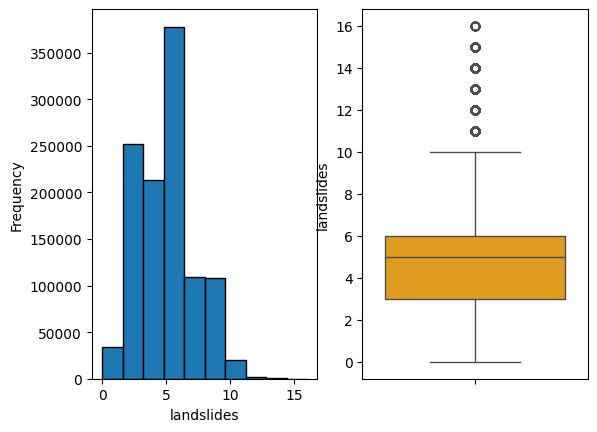

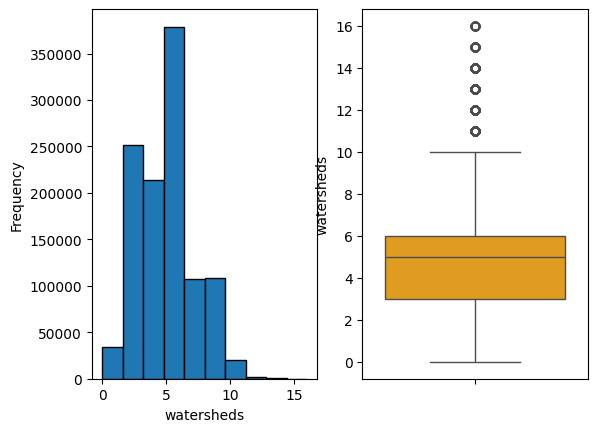

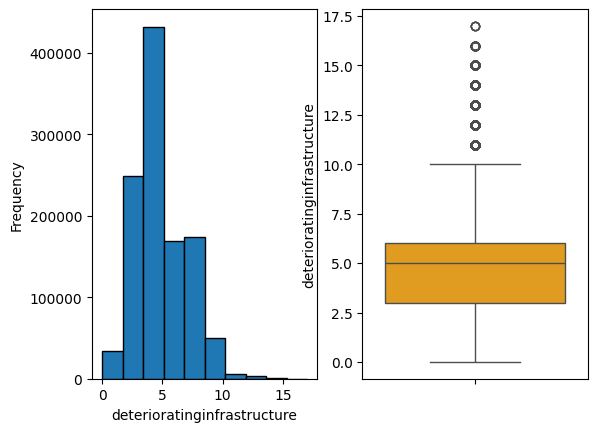

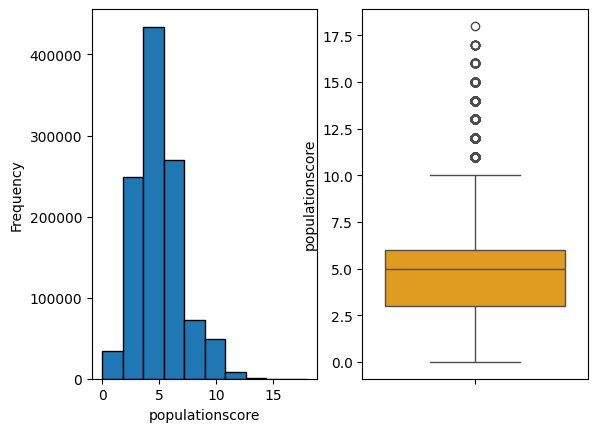

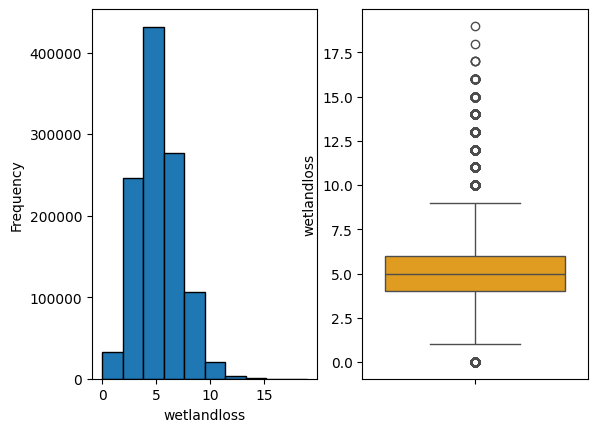

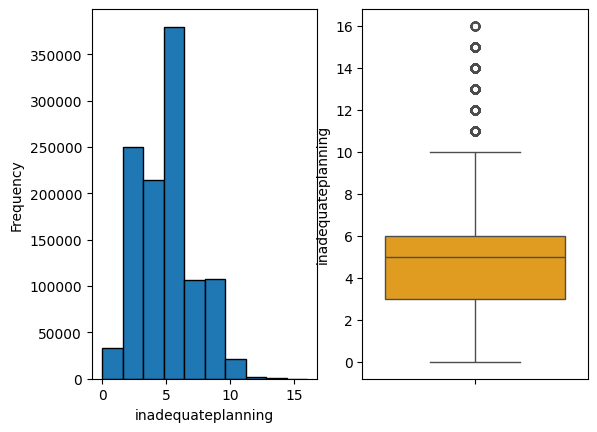

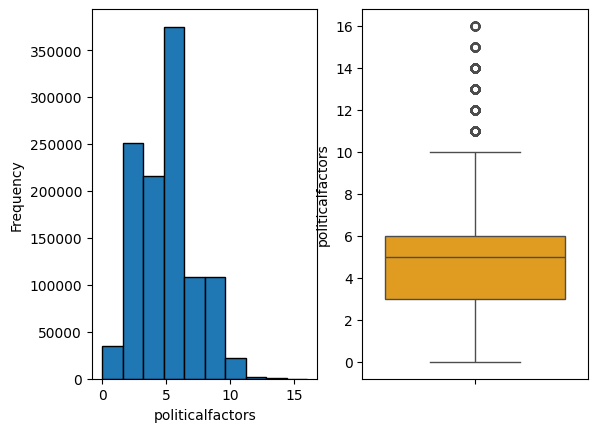

In [19]:
for i in df[features]:
    plt.subplot(1,2,1)
    plt.hist(df[i], edgecolor = 'black')
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    sns.boxplot(df[i], color = 'orange')
    
    plt.show()

In [20]:
df

,monsoonintensity,topographydrainage,rivermanagement,deforestation,urbanization,climatechange,damsquality,siltation,agriculturalpractices,encroachments,...,drainagesystems,coastalvulnerability,landslides,watersheds,deterioratinginfrastructure,populationscore,wetlandloss,inadequateplanning,politicalfactors,floodprobability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,...,7,8,7,2,2,1,4,6,4,0.495
1117953,2,2,4,3,9,5,8,1,3,5,...,9,4,4,3,7,4,9,4,5,0.480
1117954,7,3,9,4,6,5,9,1,3,4,...,5,5,5,5,6,5,5,2,4,0.485
1117955,7,3,3,7,5,2,3,4,6,4,...,6,8,5,3,4,6,7,6,4,0.495


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((894365, 20), (223592, 20), (894365, 1), (223592, 1))

In [25]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:
X_test_scaled 

array([[ 1.01133545,  0.03679651,  1.47188622, ...,  0.50304082,
         0.98885968, -1.40751658],
       [ 0.03671941, -0.91727149,  2.43664103, ..., -1.42710557,
         1.94874365,  0.50389398],
       [ 0.03671941,  0.51383051, -1.4223782 , ...,  0.98557741,
         0.50891769,  0.02604134],
       ...,
       [-0.93789663,  1.46789851, -0.4576234 , ...,  2.4331872 ,
        -0.45096627,  1.93745189],
       [ 0.03671941,  0.03679651, -0.9400008 , ...,  1.46811401,
        -0.45096627, -0.4518113 ],
       [-0.45058861,  0.03679651,  0.50713141, ..., -1.42710557,
        -0.93090826,  0.02604134]])

In [45]:
y_pred = lin_reg.predict(X_test_scaled)

In [46]:
y_pred[0], y_test

(array([0.53400462]),
          floodprobability
 1105809             0.560
 442591              0.575
 5434                0.510
 82966               0.530
 584893              0.590
 ...                   ...
 17711               0.625
 874414              0.560
 390691              0.535
 368042              0.530
 776519              0.495
 
 [223592 rows x 1 columns])

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test, y_pred)

0.8448736323635013

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

two degree polynomial reg

In [49]:
poly_2 = PolynomialFeatures(2)
X_poly_2nd = poly_2.fit_transform(X_train_scaled)

In [51]:
lin_reg_2nd = LinearRegression()
lin_reg_2nd.fit(X_poly_2nd, y_train)

LinearRegression()

In [53]:
X_test_poly_2nd = poly_2.fit_transform(X_test_scaled)
y_pred_2nd = lin_reg_2nd.predict(X_test_poly_2nd)

In [54]:
r2_score(y_test, y_pred_2nd)

0.845411103158038

In [57]:
from sklearn.linear_model import Ridge, Lasso

In [66]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [67]:
y_pred_ridge = ridge_reg.predict(X_test_scaled)
r2_score(y_test, y_pred_ridge)

0.8448736322182065

In [88]:
lasso_reg = Lasso(tol=0.1)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(tol=0.1)

In [89]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)
r2_score(y_test, y_pred_lasso)

-2.0418489121709626e-10

In [74]:
y_pred_lasso

array([0.50448018, 0.50448018, 0.50448018, ..., 0.50448018, 0.50448018,
       0.50448018])

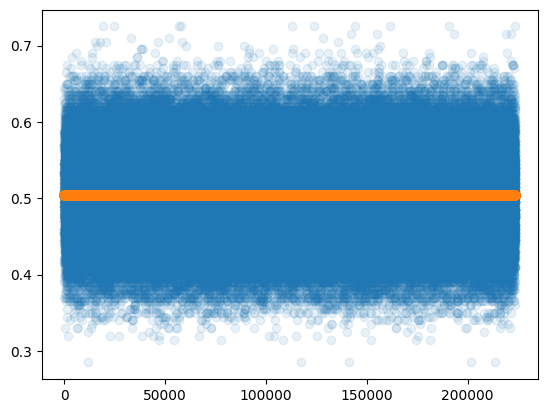

In [103]:
X_ = [i for i in range(len(y_test))]
plt.scatter(X_, y_test, alpha = 0.1, label = 'Test Data')
plt.scatter(X_, y_pred_lasso)
#plt.scatter(X_, y_pred_ridge)
plt.show()

In [104]:
from sklearn.svm import SVR

In [111]:
svr_reg = SVR(kernel = 'poly')

In [ ]:
svr_reg.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_svr = svr_reg.predict(X_test_scaled)

In [109]:
r2_score(y_test, y_pred_svr)

0.6470991848799359